In [2]:
import joblib
import pickle
import numpy as np
from utils.models import Classification
from utils.model_evaluation import performance_evaluate, plot_auc_roc
from sklearn.preprocessing import StandardScaler

In [3]:
# Dataset names
# syn3_final
# real1_final
# syn5_final
# syn2_final
# syn4_final
# syn1_final
# real2_final

In [4]:
# Golden Valid Dataset
valid_file = "real2_final"
filename = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/feature_set/feature_set_{valid_file}_final.pickle"
with open(f'{filename}', 'rb') as handle:
    valid_dataset = pickle.load(handle)
x_valid, y_valid = valid_dataset["median_input"].to_numpy(), valid_dataset["y_label"].to_numpy()

In [5]:
# Only run if combined
combined_model_valid = valid_dataset.copy()
combined_model_valid["median_input"]["is_syn"] = 0
x_valid, y_valid = combined_model_valid["median_input"].to_numpy(), combined_model_valid["y_label"].to_numpy()

In [6]:
# Read Feature File
# syn3_final
# real1_final
# syn5_final
# syn2_final
# syn4_final
# syn1_final
# real2_final
file = "real1_final"
long_name = f"feature_set_{file}_final.pickle"
long_name = f"combined_dataset_real1_syn3_4.pickle"
# long_name = "combined_dataset.pickle"
filename = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/feature_set/{long_name}"
with open(f'{filename}', 'rb') as handle:
    dataset = pickle.load(handle)

classifier = Classification()

## Decision Tree

In [56]:
params = {
    "max_depth": np.arange(2,5,1), # 
    "min_samples_split": np.arange(2,6,2)
}

In [29]:
x_train, y_train = dataset["median_input"].to_numpy(), dataset["y_label"].to_numpy()

tuner, best_params, tuner_results = classifier.hyperparameter_tuning(
    df_tuple=(x_train, y_train),
    score_metric="f1_weighted",
    kfold_type="repeatedKfold",
    n_splits=4,
    params=params,
    model_name="decision_tree"
)

# Save file
model_name = f"{file}_median_impute_dt"
save_path = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets/{model_name}.joblib"
joblib.dump(tuner.best_estimator_, save_path)

Model Tuning Starttime :: 2024-02-27 06:32:55.405473
Model Tuning Completed :: 2024-02-27 06:32:55.866469


['/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets/syn3_final_median_impute_dt.joblib']

 Macro Precision :  0.94, Recall :  0.94, F1 :  0.94
 Micro Precision :  0.94, Recall :  0.94, F1 :  0.94
 binary Precision :  0.93, Recall :  0.92, F1 :  0.93


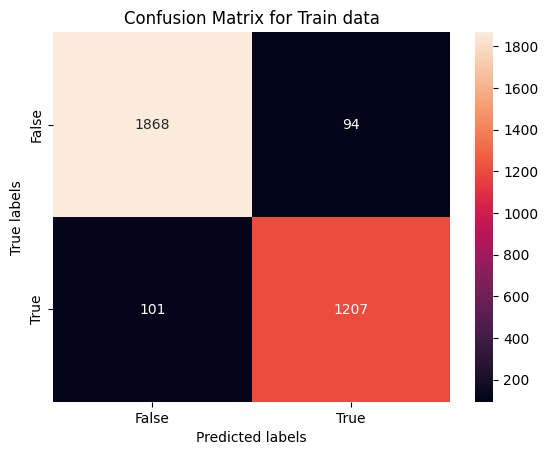

 Macro Precision :  0.91, Recall :  0.88, F1 :  0.89
 Micro Precision :  0.90, Recall :  0.90, F1 :  0.90
 binary Precision :  0.94, Recall :  0.79, F1 :  0.86


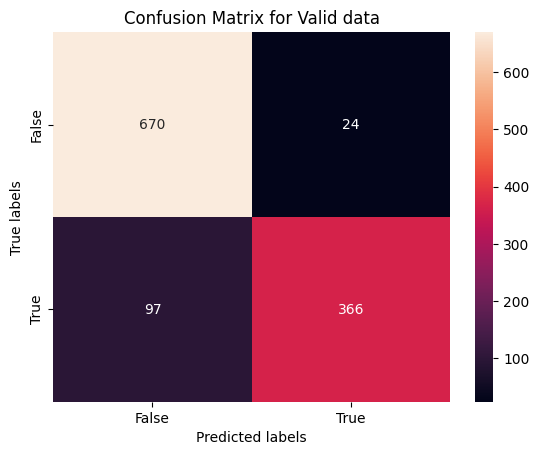

In [6]:
model_name = f"{file}_median_impute_dt"
x_train, y_train = dataset["median_input"].to_numpy(), dataset["y_label"].to_numpy()
performance_evaluate(
    train_dataset=(x_train, y_train),
    valid_dataset=(x_valid, y_valid),
    model_name = model_name,
    filepath = "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets"
)


## Random Forest

In [160]:
# Tuning to reduce the overfitting - as there is a divide between Train F1 and test F1
params = {
    "max_depth": np.arange(3,7,1), # 
    "min_samples_split": np.arange(12,16,2),
    "max_features": np.arange(12,14,2)
}

In [161]:
x_train, y_train = dataset["median_input"].to_numpy(), dataset["y_label"].to_numpy().ravel()

tuner, best_params, tuner_results = classifier.hyperparameter_tuning(
    df_tuple=(x_train, y_train),
    score_metric="f1_weighted",
    kfold_type="repeatedKfold",
    n_splits=10,
    params=params,
    model_name="random_forest"
)

# Save file
# model_name = f"{file}_median_impute_rf"
model_name = f"{file}_median_impute_rf_v1"
save_path = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets/{model_name}.joblib"
joblib.dump(tuner.best_estimator_, save_path)
print(f"best params for {model_name} {file} :: { best_params}")

Model Tuning Starttime :: 2024-02-27 21:33:06.322218


54412.89s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
54412.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
54412.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
54412.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
54412.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
54412.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
54412.95s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
54412.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Model Tuning Completed :: 2024-02-27 21:33:31.824197
best params for real1_final_median_impute_rf_v1 real1_final :: {'max_depth': 6, 'max_features': 12, 'min_samples_split': 12}


 Macro Precision :  0.97, Recall :  0.97, F1 :  0.97
 Micro Precision :  0.97, Recall :  0.97, F1 :  0.97
 binary Precision :  0.98, Recall :  0.94, F1 :  0.96


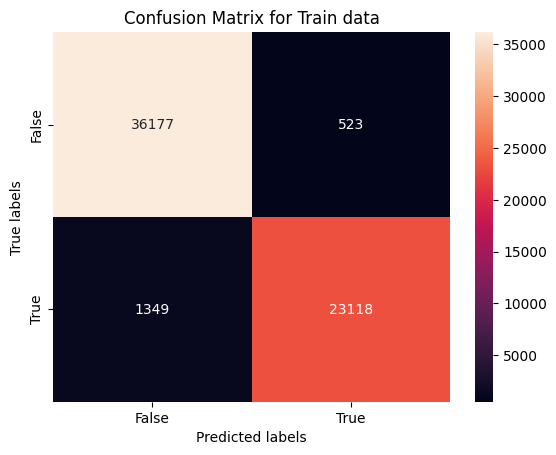

 Macro Precision :  0.97, Recall :  0.91, F1 :  0.94
 Micro Precision :  1.00, Recall :  1.00, F1 :  1.00
 binary Precision :  0.95, Recall :  0.82, F1 :  0.88


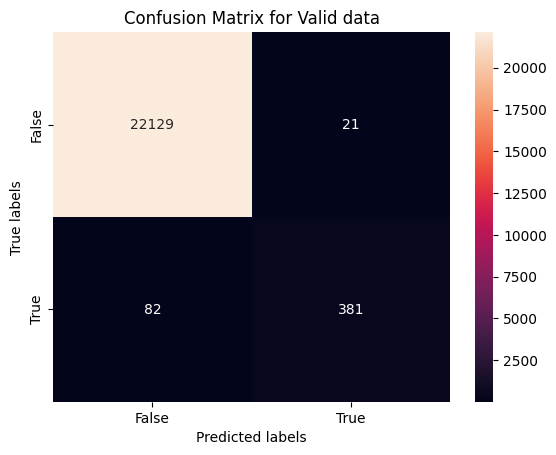

In [8]:
# file = "combined"
model_name = f"{file}_median_impute_rf_v1"
# model_name = f"{file}_median_impute_rf"
# model_name = f"{file}_median_impute_rf_increase_split"
model_name = "combined_dataset_real1_syn3_4_median_impute_rf"

x_train, y_train = dataset["median_input"].to_numpy(), dataset["y_label"].to_numpy()
performance_evaluate(
    train_dataset=(x_train, y_train),
    valid_dataset=(x_valid, y_valid),
    model_name = model_name,
    filepath = "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets"
)


In [ ]:
file = "syn1_final"
model_name = f"{file}_median_impute_rf_v1"
# model_name = f"{file}_median_impute_rf"
# model_name = f"{file}_median_impute_rf_increase_split"

x_train, y_train = dataset["median_input"].to_numpy(), dataset["y_label"].to_numpy()
performance_evaluate(
    train_dataset=(x_train, y_train),
    valid_dataset=(x_valid, y_valid),
    model_name = model_name,
    filepath = "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets"
)


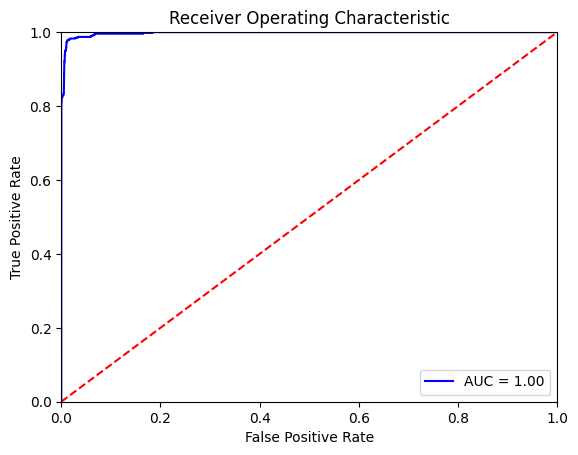

In [156]:
model_name = "combined_dataset_real1_syn3_4_median_impute_rf"
plot_auc_roc(
    valid_dataset=(x_valid, y_valid),
    model_name = model_name,
    filepath = "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets"    
)

# SVM

In [25]:
x_train, y_train = dataset["mean_input"].to_numpy(), dataset["y_label"].to_numpy().ravel()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [27]:
params = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}  

tuner, best_params, feature_importance, tuner_results = classifier.hyperparameter_tuning(
    df_tuple=(x_train, y_train),
    score_metric="f1_weighted",
    kfold_type="repeatedKfold",
    n_splits=4,
    params=params,
    model_name="svc"
)

# Save file
model_name = "real1_mean_impute_svc"
save_path = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets/{model_name}.joblib"
joblib.dump(tuner.best_estimator_, save_path)

Model Tuning Starttime :: 2024-02-20 08:57:47.633259


KeyboardInterrupt: 

In [ ]:
performance_evaluate(
    data_set=(x_train, y_train),
    model_name = model_name,
    filepath = "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets"
)


# KNN Classifier

In [6]:
params = { 'n_neighbors' : [1,2, 5, 7],
        'weights' : ['uniform','distance'],
        'metric' : ['euclidean','manhattan']}

In [7]:
x_train, y_train = dataset["mean_input"].to_numpy(), dataset["y_label"].to_numpy().ravel(),

tuner, best_params, feature_importance, tuner_results = classifier.hyperparameter_tuning(
    df_tuple=(x_train, y_train),
    score_metric="f1_weighted",
    kfold_type="repeatedKfold",
    n_splits=4,
    params=params,
    model_name="knn"
)

# Save file
model_name = "real1_mean_impute_knn"
save_path = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets/{model_name}.joblib"
joblib.dump(tuner.best_estimator_, save_path)

Model Tuning Starttime :: 2024-02-20 09:16:42.204164


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/threadpoolctl.py:1195: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/threadpoolctl.py:1195: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/threadpoolctl.py:1195: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/threadpoolctl.py:1195: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/threadpoolctl.py:1195: RuntimeWarning: libc not found. The ctypes module i

Model Tuning Completed :: 2024-02-20 09:18:47.551519


ValueError: not enough values to unpack (expected 4, got 3)

In [ ]:
performance_evaluate(
    data_set=(x_train, y_train),
    model_name = model_name,
    filepath = "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets"
)


# Niave Bayes Classifier